# 机器学习之支持向量机

#### 【简介】

**支持向量机** (Support Vector Machine, SVM) 是由Vapnik等人于1995年提出来的，之后随着统计理论的发展，支持向量机SVM也逐渐受到了各领域研究者的关注，在很短的时间就得到了很广泛的应用。

支持向量机是被公认的比较优秀的分类模型。同时，在支持向量机的发展过程中，其理论方面的研究得到了同步的发展，为支持向量机的研究提供了强有力的理论支撑。

#### 【目录】

1. [线性可分支持向量机](#1.-线性可分支持向量机)
2. [线性支持向量机](#2.-线性支持向量机)
3. [非线性支持向量机](#3.-非线性支持向量机)
4. [序列最小优化算法](#4.-序列最小优化算法)
5. [支持向量回归](#5.-支持向量回归)

## 1. 线性可分支持向量机

### 线性二分类问题

线性二分类问题的本质上就是找到一条决策边界，将我们的数据分成两类。如下图：

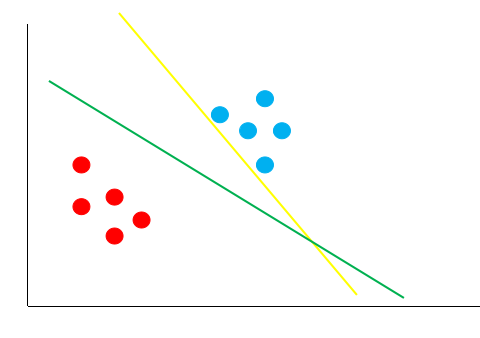

图中的绿线与黄线都能很好的将图中的红点与蓝点给区分开。但是，哪条线的泛化性更好呢？可能你不太了解泛化性，也就是说，我们的这条直线，不仅需要在**训练集**(已知的数据)上能够很好的将红点跟蓝点区分开来，还要在**测试集**(未知的数据) 上将红点跟蓝点给区分开来。

假如经过训练，我们得到了黄色的这条决策边界用来区分我们的数据，这个时候又来了一个数据，即黑色的点，那么你觉得黑色的点是属于红的这一类，还是蓝色的这一类呢？

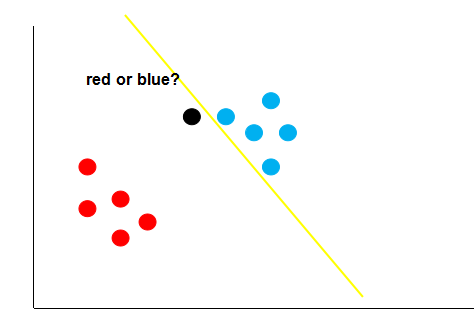

如上图，根据黄线的划分标准，黑色的点应该属于红色这一类。可是，我们肉眼很容易发现，黑点离蓝色的点更近，它应该是属于蓝色的点。这就说明，黄色的这条直线它的泛化性并不好，它对于未知的数据并不能很好的进行分类。那么，如何得到一条**泛化性好的直线**呢？这个就是**支持向量机**考虑的问题。

### 基本思想

支持向量机的思想认为，一条决策边界它如果要有很好的泛化性，它需要满足一下以下两个条件：

- 能够很好的将样本划分
- 离最近的样本点最远

比如下图中的黑线：

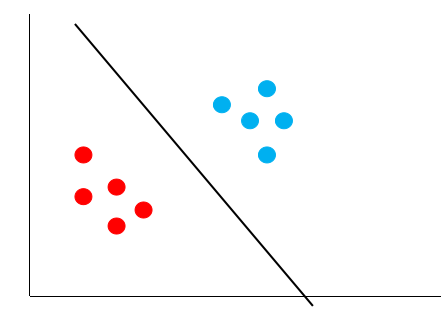

它能够正确的将红点跟蓝点区分开来，而且，它还保证了对未知样本的容错率，因为它离最近的红点跟蓝点都很远，这个时候，再来一个数据，就不会出现之前黄色决策边界的错误了。

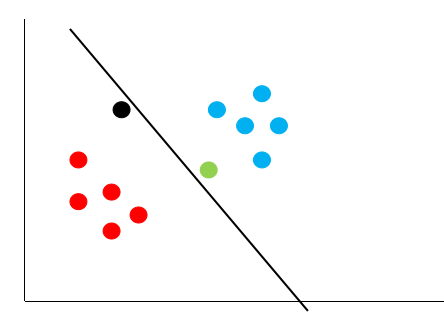

无论新的数据出现在哪个位置，黑色的决策边界都能够很好的给它进行分类，这个就是支持向量机的基本思想。

### 间隔与支持向量

在样本空间中，决策边界可以通过如下线性方程来描述：

$$
w^Tx + b = 0
$$

其中 $w = (w_1, w_2, ..., w_d)$ 为**法向量**，决定了**决策边界的方向**。$b$为**位移项**，决定了**决策边界与原点之间的距离**。显然，**决策边界**可被**法向量**和**位移**确定，我们将其表示为$(w,b)$。样本空间中的任意一个点$x$,到决策边界$(w,b)$的距离可写为：

$$
r = \frac{|w^Tx + b|}{||w||}
$$

假设决策边界$(w,b)$能够将训练样本正确分类，即对于任何一个样本点$(x_i,y_i)$,若它为正类，即$y_i=+1$时，$w^Tx+b \geq +1$。若它为负类，即$y_i=−1$时，$w^Tx+b \leq −1$。

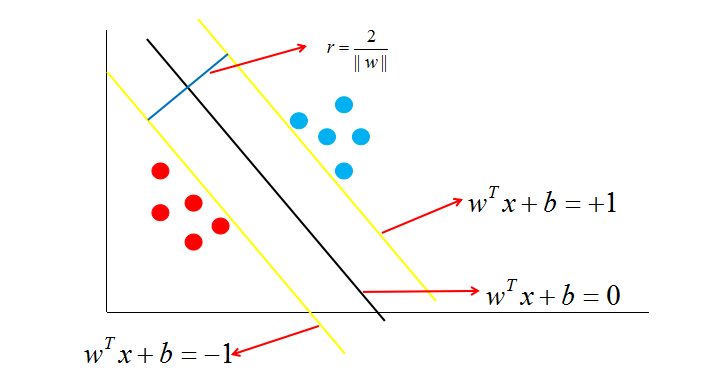

如图中，距离最近的几个点使两个不等式的等号成立，它们就被称为支持向量，即图中两条黄色的线。两个异类支持向量到超平面的距离之和为：

$$
r = \frac{2}{||w||}
$$

它被称为间隔，即蓝线的长度。欲找到具有“最大间隔”的决策边界，即黑色的线，也就是要找到能够同时满足如下式子的$w$与$b$:

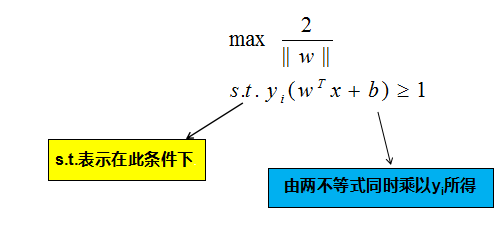

## 2. 线性支持向量机

### 任务描述

使用`sklearn`实现线性支持向量机，并通过癌细胞数据中训练集对模型进行训练，再对测试集癌细胞数据进行识别。

### 相关知识

为了完成本任务，需要掌握：

1. 软间隔
2. LinearSVC

#### 数据集介绍

乳腺癌数据集的样本数量是569，样本中包括**诊断类别**和**属性**，用来预测的属性一共30个，如：

- radius：半径（从中心到边缘上点的距离的平均值）
- texture：纹理（灰度值的标准偏差）等等

诊断类别有： 

- WDBC-Malignant：恶性
- WDBC-Benign：良性

数据集的80%作为训练集，数据集的20%作为测试集，训练集和测试集中都包括特征和类别。其中特征和类别均为数值类型，类别中0代表良性， 1代表恶性。

sklearn中已经提供了乳腺癌数据集的相关接口，可通过sklearn.datasets的load_breast_cancer()函数加载。

In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
# 加载乳腺癌数据集
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


#### 软间隔

假如现在有一份数据分布如下图：

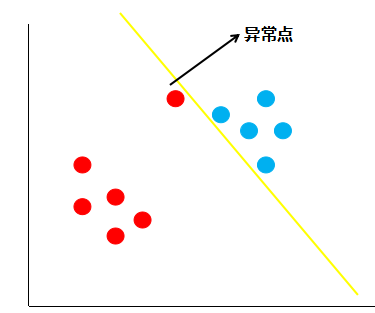

按照**线性可分支持向量机**的思想，黄色的线就是最佳的决策边界。很明显，这条线的泛化性不是很好，造成这样结果的原因就是**数据中存在着异常点**，那么如何解决这个问题呢，支持向量机引入了**软间隔最大化**的方法来解决。

所谓的**软间隔**，是相对于硬间隔说的，即之前我们所讲的支持向量机学习方法。回顾下硬间隔最大化的条件：

$$
min \frac{1}{2}||w||^2 \\
s.t.y_i(w^Tx + b) \geq 1
$$

接着我们再看如何可以**软间隔最大化**呢？SVM对训练集里面的每个样本$(x_i,y_i)$引入了一个松弛变量$x_i \geq 0$,使函数间隔加上松弛变量大于等于1，也就是说：

$$
y_i(w^Tx + b) \geq 1 - x_i
$$

对比硬间隔最大化，可以看到我们对样本到超平面的函数距离的要求放松了，之前是一定要大于等于1，现在只需要加上一个大于等于0的松弛变量能大于等于1就可以了。也就是允许支持向量机在一些样本上出错，如下图：

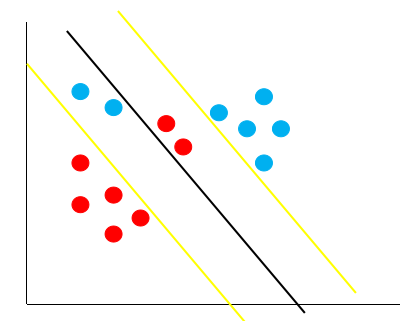

### 实操练习

#### 编程要求

请仔细阅读下列代码，结合相关知识，在Begin-End区域内进行代码补充，完成使用sklearn实现线性支持向量机的任务。

#### 测试说明

输出预测正确率，应大于0.95

In [8]:
from sklearn.svm import LinearSVC

def linearsvc_predict(X_train, y_train, X_test):
    '''
    input:X_train(ndarray):训练数据
          y_train(ndarray):训练标签
          X_train(ndarray):测试数据
    output:(ndarray):测试集预测结果标签
    '''
    #********* Begin *********# 
    clf = LinearSVC(dual=False)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    #********* End *********# 
    return pred

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载乳腺癌数据集
cancer = load_breast_cancer()

# 拆分数据集，训练集占比80%,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, 
    test_size = 0.2, random_state = 1
)

# 训练并预测
y_pred = linearsvc_predict(X_train, y_train, X_test)

# 评估模型
print('正确率:{:.2f}'.format(accuracy_score(y_test, y_pred)))

正确率:0.97


## 3. 非线性支持向量机

### 任务描述

使用sklearn实现非线性支持向量机，并通过鸢尾花数据中训练集对模型进行训练，再对测试集鸢尾花数据进行分类。

### 相关知识

为了完成本任务，需要掌握：

1. 核方法 
2. SVC

#### 数据集介绍

数据集为**鸢尾花数据**，一共有三个类别150个样本，每个样本有4个特征，由于**支持向量机**是一个**二分类模型**，这里我们只利用其中**两个特征**与**两种类别**（共100个样本）训练模型，且支持向量机算法返回的值为1与-1，所以要将标签为0的数据改为-1。数据获取及处理的代码如下：

In [15]:
from sklearn.datasets import load_iris
import numpy as np

#获取并处理鸢尾花数据
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    #将标签为0的数据标签改为-1
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    return data[:,:2], data[:,-1]

In [23]:
data, target = create_data()
data.shape, target.shape

((100, 2), (100,))

#### 核方法

我们的数据集有时候是非线性可分的情况，如下图：

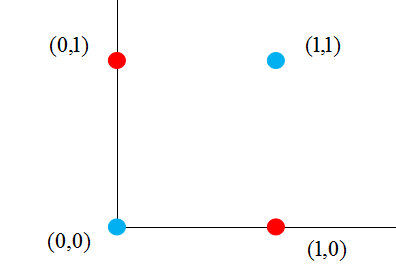

对于非线性的情况，SVM的处理方式就是选择一个核函数。简而言之：在线性不可分的情况下，SVM通过某种事先选择的**非线性映射**（**核函数**）将**输入变量映射到一个高维特征空间**，将其变成在**高维空间线性可分**，在这个高维空间中**构造最优分类超平面**。如将本关上图数据集映射成如下情况：

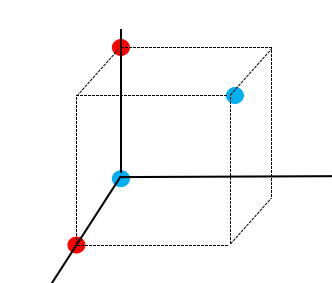

### 实操练习

#### 编程要求

请仔细阅读下列代码，结合相关知识，在 Begin-End 区域内进行代码补充，完成使用sklearn实现非线性支持向量机的任务。

#### 测试说明

输出预测正确率，应大于0.95

In [37]:
from sklearn.svm import SVC
# 使用SVC进行训练与测试
def svc_predict(X_train, y_train, X_test, kernel):
    '''
    input:X_train(ndarray):训练数据
          y_train(ndarray):训练标签
          X_test(ndarray):测试数据
          kernel(str):使用核函数类型:
              'linear':线性核函数
              'poly':多项式核函数
              'rbf':径像核函数/高斯核
    output:测试集的预测结果
    '''
    #********* Begin *********# 
    clf = SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    #********* End *********# 
    return pred

In [38]:
iris_data, iris_target = create_data()

# 拆分数据集，训练集占比80%,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_target, 
    test_size = 0.2, random_state = 123
)

# 训练并预测
y_pred = svc_predict(X_train, y_train, X_test, kernel='poly')

# 评估模型
print('正确率:{:.2f}'.format(accuracy_score(y_test, y_pred)))

正确率:1.00


## 4. 序列最小优化算法

### 任务描述

使用python实现**序列最小化优化**（Sequence Minimal Optimization,SMO）算法，并通过社交网络数据中训练集对模型进行训练，再对测试集社交网络数据进行预测。

### 相关知识

为了完成本任务，需要掌握：

1. 序列最小优化算法
2. 序列最小优化算法流程

#### 数据集介绍

社交网络数据集共包括400个样本，有**年龄**跟**工资**等特征，标签为**是否购买房产**，1表示已购买，0表示未购买。我们取300个样本作为训练集，100个样本作为测试集。

获取并对数据进行预处理的代码如下：

In [42]:
# 获取数据
import pandas as pd
dataset = pd.read_csv('./data/social-network-ads.csv')
data = dataset.iloc[:, [2, 3]].values
data = data.astype(float)
target = dataset.iloc[:, 4].values
# 将0替换为-1
target[target==0] = -1
# 拆分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, 
    test_size = 0.25, random_state = 61
)
# 特征标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 序列最小优化算法

##### smo算法基本思想

支持向量机的学习问题可以形式化为**求解凸二次规划**问题。这样的凸二次规划问题具有全局最优解，并且有许多最优化算法可以用于这一问题的求解。但是当训练样本容量很大时，这些算法往往变得非常低效,以致无法使用。所以，如何高效地实现支持向量机学习就成为一个重要的问题。目前人们已提出许多快速实现算法。其中最具代表的就是**序列最小最优化算法**（sequential minimal optimization，smo）。

smo算法要解如下凸二次规划的对偶问题：

$$
min(\frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j k(x_i,x_j) - \sum_{i=1}^m \alpha_i) \\
s.t.\sum_{i=1}^m \alpha_i y_i = 0 \\
0 \leq \alpha_i \leq C
$$

smo算法是一种**启发式算法**， 其基本思路是：如果所有变量的解都满足此最优化问题的KKT条件，那么这个最优化问题的解就得到了。因为KKT条件是该最优化问题的充分必要条件。否则,选择两个变量，固定其他变量，针对这两个变量构建一个二次规划问题。这个二次规划问题关于这两个变量的解应该更接近原始二次规划问题的解，因为这会使得原始二次规划问题的目标函数值变得更小。重要的是，这时子问题可以通过解析方法求解，这样就可以大大提高整个算法的计算速度。子问题有两个变量,一个是违反KKT条件最严重的那一个，另一个由约束条件自动确定。如此，smo算法将原问题不断分解为子问题并对子问题求解，进而达到求解原问题的目的。具体如下：

选择两个变量$\alpha_1$,$\alpha_2$，其它变量$\alpha_i,i=3,4,..m$是固定的。于是，smo的最优化问题的子问题可以写成：

$$
min(\frac{1}{2}k_{11}\alpha_1^2 + \frac{1}{2}k_{22}\alpha_2^2 + y_1y_2k_{12}\alpha_1\alpha_2 - (\alpha_1 + \alpha_2) + y_1)
$$

$$
s.t. \alpha_1y_1 + \alpha_2y_2 = - \sum_{i=3}^my_i\alpha_i = x_i
$$

$$
0\leq \alpha_i \leq C, i = 1, 2
$$

#### smo算法目标函数的优化

为了求解上面含有这两个变量的目标优化问题，我们首先分析约束条件，所有的$\alpha_1,\alpha_2$都要满足约束条件，然后在约束条件下求最小。

根据上面的约束条件$\alpha_1y_1 + \alpha_2y_2=x_i,0\leq\alpha_i\leq C,i=1,2$，又由于$y_1,y_2$均只能取值$1$或者$-1$, 这样$\alpha_1,\alpha_2$在$[0,C]$和$[0,C]$形成的盒子里面，并且两者的关系直线的斜率只能为$1$或者$-1$，也就是说$\alpha_1,\alpha_2$的关系直线平行于$[0,C]$和$[0,C]$形成的盒子的对角线，如下图所示：

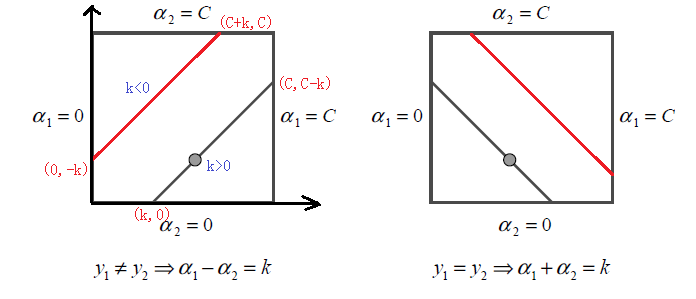

### 实操练习

#### 编程要求

请仔细阅读下列代码，结合相关知识，在Begin-End区域内进行代码补充，完成使用python实现smo算法的任务。

#### 测试说明

输出预测正确率，应高于0.9

In [43]:
import numpy as np
class SMO:
    def __init__(self, max_iter=100, kernel='linear'):
        '''
        input:max_iter(int):最大训练轮数
              kernel(str):核函数，等于'linear'表示线性，等于'poly'表示多项式
        '''
        self.max_iter = max_iter
        self._kernel = kernel
    #初始化模型
    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0
        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        # 错误惩罚参数
        self.C = 1.0
    #********* Begin *********#    
    #kkt条件    
    def _KKT(self, i):
        y_g = self._g(i)*self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1
    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j]*self.Y[j]*self.kernel(self.X[i], self.X[j])
        return r
    # 核函数,多项式添加二次项即可
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k]*x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k]*x2[k] for k in range(self.n)]) + 1)**2    
        return 0
    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]
    #初始alpha
    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)
        for i in index_list:
            if self._KKT(i):
                continue
            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j
    #选择alpha参数   
    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha
    #训练
    def fit(self, features, labels):
        '''
        input:features(ndarray):特征
              label(ndarray):标签
        '''
        self.init_args(features, labels)
        for t in range(self.max_iter):
            i1, i2 = self._init_alpha()
            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1]+self.alpha[i2]-self.C)
                H = min(self.C, self.alpha[i1]+self.alpha[i2])
            else:
                L = max(0, self.alpha[i2]-self.alpha[i1])
                H = min(self.C, self.C+self.alpha[i2]-self.alpha[i1])
            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(self.X[i2], self.X[i2]) - 2*self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                continue
            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (E2 - E1) / eta
            alpha2_new = self._compare(alpha2_new_unc, L, H)
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (self.alpha[i2] - alpha2_new)
            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (alpha1_new-self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i1]) * (alpha2_new-self.alpha[i2])+ self.b 
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (alpha1_new-self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i2]) * (alpha2_new-self.alpha[i2])+ self.b 
            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2
            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new
            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
    
    def predict(self, data):
        '''
        input:data(ndarray):单个样本
        output:预测为正样本返回+1，负样本返回-1
        '''
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])
        return 1 if r > 0 else -1
    #********* End *********# 

In [45]:
# 加载smo模型并训练模型
clf = SMO(kernel='poly')    
clf.fit(X_train, y_train)

# 获取预测标签
pred = []
for i in range(len(X_test)):
    pred.append(clf.predict(X_test[i]))

pred = np.array(pred)

# 计算正确率
acc = np.mean(pred == y_test)
print('预测正确率：{:.2f}'.format(acc))

预测正确率：0.91


## 5. 支持向量回归

### 任务描述

使用sklearn实现支持向量机回归模型，并通过波斯顿数据集中训练集对模型进行训练，再对测试集的波士顿房价进行预测。

### 相关知识

为了完成本任务，需要掌握：

1. 软间隔 
2. LinearSVR

具体内容请参考[线性支持向量机](2.-线性支持向量机)

### 实操练习

#### 编程要求

请仔细阅读下列代码，结合相关知识，在`Begin-End`区域内进行代码补充，完成使用`sklearn`实现线性支持向量机的任务。

#### 测试说明

请输出预测结果的R2分数，应高于0.72

In [75]:
from sklearn.svm import SVR

def svr_predict(X_train, y_train, X_test):
    '''
    input:X_train(ndarray):训练数据
          y_train(ndarray):训练标签
          X_test(ndarray): 测试数据
    output:predict(ndarray):测试集预测标签
    '''
    #********* Begin *********#
    svr = SVR(kernel='rbf',C=100, gamma=0.001,epsilon=0.1)
    svr.fit(X_train, y_train)
    pred = svr.predict(X_test)
    #********* End *********#
    return pred

In [76]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 加载乳腺癌数据集
boston = load_boston()

# 拆分数据集，训练集占比80%,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, 
    test_size = 0.2, random_state = 22
)

# 训练并预测
y_pred = svr_predict(X_train, y_train, X_test)

# 评估模型
r2 = r2_score(y_test, y_pred)
print('正确率:{:.2f}'.format(r2))

正确率:0.73
